In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

% matplotlib inline

C:\Users\JoonHo Lee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exploring Image DataSet

In [3]:
x_train.shape  # 28x28의 데이터셋이 60000개가 묶여있는 것을 확인

(60000, 28, 28)

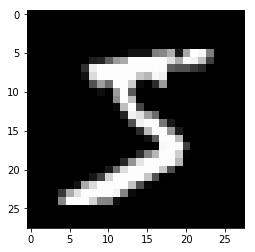

In [4]:
plt.imshow(x_train[0], 'gray')
plt.show()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
y_train[0]  # [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]  One-Hot Encoding으로 변환해준다 

5

In [7]:
np.unique(y_train)  # 정답 데이터의 고유 숫자는 0~9까지인 것을 확인

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

그러면 우리가 앞에서 봤던 것은  
학습 데이터셋은 6만개가 있었고, 이미지는 28x28이 있고,  
Label 정답데이터는 숫자로만 적혀있다.  
하지만 Label은 정답인 숫자나 string으로 학습 시켜줄 수 없어.  
OneHot-Encoding으로 변환해주어야 한다.  

# Build a model

In [8]:
n_input = 784  # 28 x 28
num_classes = 10

x = tf.placeholder('float', [None, n_input], name='data_input')
y = tf.placeholder('float', [None, num_classes], name='groundtruth')

In [9]:
def multilayer_perceptron(data_input):
    w1 = tf.Variable(tf.random_normal([n_input, 256], stddev=0.1), name='w1')
    b1 = tf.Variable(tf.random_normal([256], stddev=0.1), name='b1')
    layer_1 = tf.add(tf.matmul(data_input, w1), b1, name='layer_2')
    act_fn_1 = tf.nn.sigmoid(layer_1, name='act1')

    w2 = tf.Variable(tf.random_normal([256, 128], stddev=0.1), name='w2')
    b2 = tf.Variable(tf.random_normal([128], stddev=0.1), name='b2')
    layer_2 = tf.add(tf.matmul(act_fn_1, w2), b2, name='layer_2')
    act_fn_2 = tf.nn.sigmoid(layer_2, name='act2')

    w_out = tf.Variable(tf.random_normal([128, num_classes], stddev=0.1), name='w_out')
    b_out = tf.Variable(tf.random_normal([num_classes], stddev=0.1), name='b_out')
    layer_out = tf.add(tf.matmul(act_fn_2, w_out), b_out, name='layer_out')
    return layer_out

In [10]:
pred = multilayer_perceptron(x)

softmax_pred = tf.nn.softmax(pred)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# np.mean(pred == y)
corr = tf.equal(tf.argmax(pred, axis=1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, 'float'))

init = tf.global_variables_initializer()
print("Functions Ready~!!!")

Functions Ready~!!!


In [11]:
# Label을 받으면 OneHot으로 인코딩
def onehot_encoder(label, num_classes=10):
    # Label의 정답을 scalar로 받는다. 
    onehot = np.zeros([num_classes])  # np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    onehot[label] = 1  # 예를 3으로 두면, np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    return onehot

In [12]:
# Batch로 묶어줄 목록을 받으면, 학습이 가능한 Mini-Batch로 변환
def make_batch(batch_list):
    batch_image = []
    batch_label = []
    for x, y in batch_list:
        batch_image.append(x.reshape(-1))  # -1은 원래 모양인 28, 28을 하나의 차원으로, 784로 변환해준다. 
        batch_label.append(onehot_encoder(y))
  
    # 각 list에 있던 여러 array를 한번에 하나의 array로 변환
    batch_image = np.asarray(batch_image)
    batch_label = np.asarray(batch_label)  
    return batch_image, batch_label

Accuracy of Epoch 0 is 0.1459. Test Accuracy is 0.1922
Accuracy of Epoch 1 is 0.2086. Test Accuracy is 0.1837
Accuracy of Epoch 2 is 0.2746. Test Accuracy is 0.3956
Accuracy of Epoch 3 is 0.3837. Test Accuracy is 0.4516
Accuracy of Epoch 4 is 0.4602. Test Accuracy is 0.5082
Accuracy of Epoch 5 is 0.5092. Test Accuracy is 0.5394
Accuracy of Epoch 6 is 0.5543. Test Accuracy is 0.5641
Accuracy of Epoch 7 is 0.5838. Test Accuracy is 0.5912
Accuracy of Epoch 8 is 0.6051. Test Accuracy is 0.6475
Accuracy of Epoch 9 is 0.6298. Test Accuracy is 0.6367
Accuracy of Epoch 10 is 0.6463. Test Accuracy is 0.6704
Accuracy of Epoch 11 is 0.6640. Test Accuracy is 0.6860
Accuracy of Epoch 12 is 0.6818. Test Accuracy is 0.7054
Accuracy of Epoch 13 is 0.7003. Test Accuracy is 0.7135
Accuracy of Epoch 14 is 0.7165. Test Accuracy is 0.7334
Accuracy of Epoch 15 is 0.7320. Test Accuracy is 0.7428
Accuracy of Epoch 16 is 0.7457. Test Accuracy is 0.7612
Accuracy of Epoch 17 is 0.7587. Test Accuracy is 0.7676
Ac

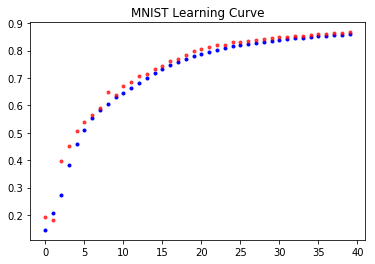

In [13]:
num_epochs = 40
batch_size = 32
display_step = 4

sess = tf.Session()
sess.run(init)

train_accurcies = []
test_accurcies = []

num_batches = int(len(x_train) // batch_size)
for epoch in range(num_epochs):
    accr_total = []

    trainset = [(x, y) for x, y in zip(x_train, y_train)]
    np.random.shuffle(trainset)

    for step in range(num_batches):
        train_batch = trainset[step * batch_size : (step + 1) * batch_size]
        batch_image, batch_label = make_batch(train_batch)

        #feed_dict = {x: batch_image, y: batch_label}
        feed_dict = {x: (255-batch_image)/255, y: batch_label}
        _, accr_value = sess.run([optm, accr], feed_dict)

        accr_total.append(accr_value)

    # Evaluate TestSet
    test_accr_total = []
    testset = [(x, y) for x, y in zip(x_test, y_test)]
    num_test_batches = int(len(testset) // batch_size)
    for step in range(num_test_batches):
        test_batch = testset[step * batch_size : (step + 1) * batch_size]
        batch_image, batch_label = make_batch(test_batch)

        feed_dict = {x: (255 - batch_image)/255, y: batch_label}
        test_accr_value = sess.run(accr, feed_dict)

        test_accr_total.append(test_accr_value)

    accuracy = np.mean(accr_total)
    test_accr = np.mean(test_accr_total)

    train_accurcies.append(accuracy)
    test_accurcies.append(test_accr)

    print('Accuracy of Epoch %d is %.4f. Test Accuracy is %.4f' % 
          (epoch, accuracy, test_accr))

        
plt.title("MNIST Learning Curve")
plt.plot(train_accurcies, 'b.')
plt.plot(test_accurcies, 'r.', alpha=0.7)
plt.show()

In [38]:
test_img_path = 'C:/Users/JoonHo Lee/Desktop/JEJU ICT 2018/Deep Learning/Workspace/num_test.png'
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

test_img.shape

test_img = cv2.resize(test_img, (28, 28))
input_test = test_img.reshape((1, -1))

prob_softmax = sess.run(softmax_pred, feed_dict={x:input_test})
prob_softmax

array([[0.0030195 , 0.37277663, 0.00285875, 0.00574216, 0.0136896 ,
        0.05655634, 0.02835892, 0.48209018, 0.00081542, 0.03409256]],
      dtype=float32)

In [39]:
pred_num = np.argmax(prob_softmax[0])
pred_prob = prob_softmax[0, pred_num]

pred_num, pred_prob

(7, 0.48209018)

In [14]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #input image
    min_size = min(gray.shape[0], gray.shape[1])
    sliced_img = gray[gray.shape[0]//2-min_size//2:gray.shape[0]//2+min_size//2,
                      gray.shape[1]//2-min_size//2:gray.shape[1]//2+min_size//2]
    
    #input의 사이즈를 28*28으로 학습 시켰기 때문에 input으로 받은 이미지를 28*28로 축소 시켜준다
    input_resized = cv2.resize(gray, (28, 28))
    input_image = np.reshape((255 - input_resized) / 255, (1, -1))
    pred_onehot, softmax_result = sess.run([pred, softmax_pred], feed_dict={x: input_image})

    pred_number = np.argmax(pred_onehot)

    result = str(pred_number)  # 예측한 결과값을 argmax로 정답 유추   >> 1
    prob = softmax_result[0, pred_number]

    result = '1'
    text = 'Result is %s with %.4f'  % (result, prob)  # Result is 1
    cv2.putText(gray, text, (gray.shape[0] - 500, gray.shape[1]//2 + 120), cv2.FONT_HERSHEY_SIMPLEX, 2, 0, thickness=5)
    
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

% matplotlib inline

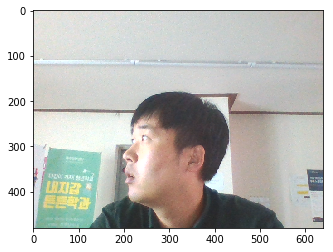

In [16]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
b, g, r = cv2.split(frame)
frame = cv2.merge((r, g, b))

plt.imshow(frame)
plt.show()

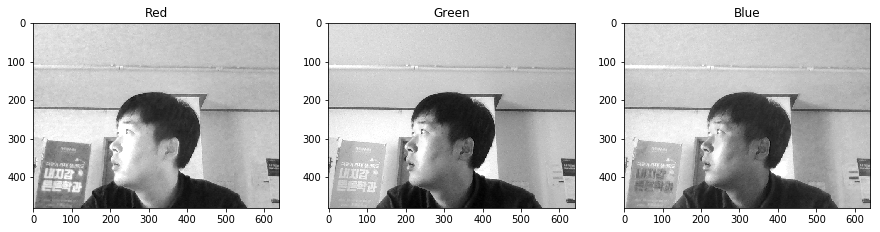

In [17]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.title("Red")
plt.imshow(r, 'gray')
plt.subplot(1, 3, 2)
plt.title("Green")
plt.imshow(g, 'gray')
plt.subplot(1, 3, 3)
plt.title("Blue")
plt.imshow(b, 'gray')
plt.show()

In [18]:
# MNIST는 gray scale로 학습
# RGB 형태인 frame을 gray scale로 변환 
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [19]:
# 이미지의 Shape가 바뀐 것 확인
frame.shape, gray.shape

((480, 640, 3), (480, 640))

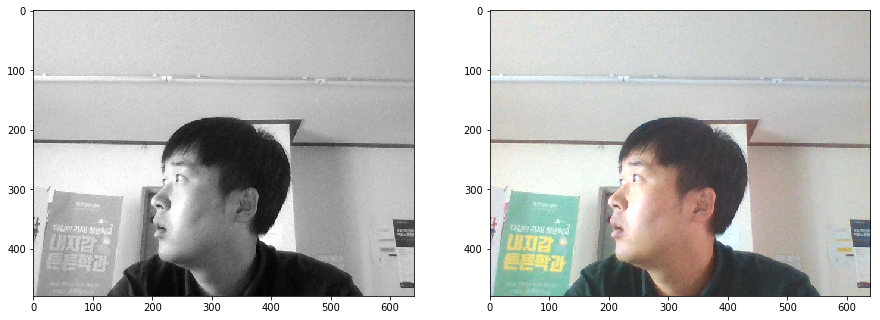

In [20]:
# RGB에서 Gray Scale로 변환된 이미지 확인
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.imshow(gray, 'gray')
plt.subplot(1,2,2)
plt.imshow(frame)
plt.show()

In [21]:
# 직사각형에서 신경망에 들어갈 때 생기는 이미지 왜곡 현상 때문에 정사각형으로 crop
min_size = min(gray.shape[0], gray.shape[1])  # 가로, 세로 중 더 짧은 axis를 기준
sliced_img = gray[gray.shape[0]//2-min_size//2:gray.shape[0]//2+min_size//2,  # 짧은 기준으로 정사각형으로 crop
                  gray.shape[1]//2-min_size//2:gray.shape[1]//2+min_size//2]

sliced_img.shape

(480, 480)

In [22]:
#input의 사이즈를 28*28으로 학습 시켰기 때문에 input으로 받은 이미지를 28*28로 축소 시켜준다
input_resized = cv2.resize(gray, (28, 28))  # (480, 480)을 (28, 28)로 축소 
input_image = np.reshape((255 - input_resized) / 255, (1, -1))  # (28, 28)을 784로 reshape

# reshape한 이미지를 그대로 신경망으로 예측
# array([0, 1, 0, 0, 0 ... ])
pred_onehot, softmax_result = sess.run([pred, softmax_pred], feed_dict={x: input_image})

pred_number = np.argmax(pred_onehot)
    
result = str(pred_number)  # 예측한 결과값을 argmax로 정답 유추   >> 1
prob = softmax_result[0, pred_number]

result = '1'
text = 'Result is %s with %.4f'  % (result, prob)  # Result is 1

In [23]:
cv2.putText(gray, text, (gray.shape[0] - 300, gray.shape[1]//2 + 120), cv2.FONT_HERSHEY_SIMPLEX, 2, 0, thickness=5)

array([[221, 224, 226, ..., 184, 180, 179],
       [221, 221, 224, ..., 185, 182, 182],
       [221, 223, 225, ..., 185, 183, 182],
       ...,
       [216, 216, 212, ..., 191, 191, 190],
       [216, 213, 210, ..., 193, 191, 192],
       [215, 212, 211, ..., 193, 192, 192]], dtype=uint8)

In [24]:
# Display the resulting frame
cv2.imshow('frame',gray)
# if cv2.waitKey(1) & 0xFF == ord('q'):
#     break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()